***
## Titanic 생존자 예측
***
### Predict Survival on the Titanic
- Defining the problom statement
- Exploratory data Analysis
- Feature engineering
- Modeling
- Testing

#### 1. 문제정의

In [2908]:
# from IPython.display import Image
# Image(url='https://ppss.kr/wp-content/uploads/2015/06/titanic-540x278.jpg')

#### 2.데이터
- 판다스 사용
    - train data
    - test data


In [2909]:
import pandas as pd
import numpy as np

In [2910]:
# 학습에 사용할 데이터 => model 생성
train = pd.read_csv('../data/train.csv')

# 모델 검증 사용할 데이터
test = pd.read_csv('../data/test.csv')

#### 탐색적 데이터 분석(EDA)

In [2911]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Directory
- Survived : 생존 여부, 0 = No, 1 = Yes 

In [2912]:
print(train[train['Pclass']==1]['Cabin'].isnull().sum(), train[train['Pclass']==1]['Cabin'].count())
print(train[train['Pclass']==2]['Cabin'].isnull().sum(), train[train['Pclass']==2]['Cabin'].count())
print(train[train['Pclass']==3]['Cabin'].isnull().sum(), train[train['Pclass']==3]['Cabin'].count())

def class_ratio(num):
    class_nan = train[train['Pclass'] == num]['Cabin'].isnull().sum()
    class_cnt = train[train['Pclass'] == num]['Cabin'].count()
    class_sum = class_nan + class_cnt
    class_rat = class_nan / class_sum
    print(num,'등칸 Nan 비율 : {0:4f}'.format(class_rat))

40 176
168 16
479 12


In [2913]:
class_ratio(1), class_ratio(2), class_ratio(3)

1 등칸 Nan 비율 : 0.185185
2 등칸 Nan 비율 : 0.913043
3 등칸 Nan 비율 : 0.975560


(None, None, None)

### Data Dictionary
#### 컬럼의 의미 파악이 핵심이다.
- Survived : 생존 여부, 0 = No, 1 = Yes => 답 
- Pclass : 등급 => 1,2,3
- Sibsp : 형제, 동승자(부부)
- Parch : 부모, 자식
- Cabin : 방번호
- Embarked : 선착장 => C, Q, S



In [2914]:
# 탐색
# 구조 파악
# 학습에 사용할 데이터
train.shape
# (헹, 열)

(891, 12)

In [2915]:
test.shape

(418, 11)

In [2916]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2917]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2918]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [2919]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2920]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [2921]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


---
### 데이터 시각화
---

In [2922]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Bar Chart for Categorical Features(Column) : 변수들의 생존 관련성
- Pclass
- Sex
- Sibsp
- Parch
- Embarked
- Cabin


In [2923]:
# Pclass vs Survived
survived = train[train['Survived']==1]['Pclass'].value_counts()
survived

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [2924]:
dead = train[train['Survived']==0]['Pclass'].value_counts()

<Axes: >

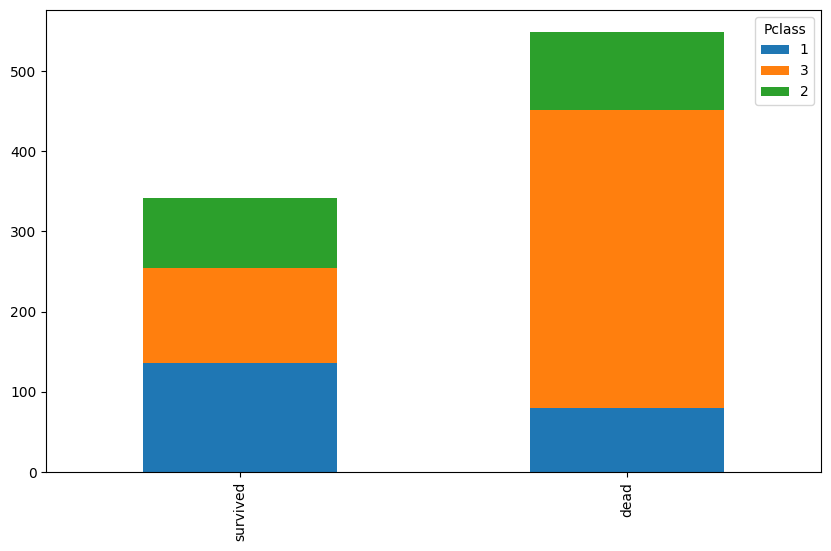

In [2925]:
df = pd.DataFrame([survived,dead])
df.index = ['survived', 'dead']
df.plot(kind='bar',stacked=True, figsize=(10,6))

In [2926]:
# Function
def bar_chart(feature):
    '''
    desc : 특정 변수들의 생존 관련성 시각화

    parameter :
    feature : 컬럼 => Pclass, Sex, SibSp, Parch, Embarked, Cabin
    '''
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar', stacked=True, figsize=(15,10))

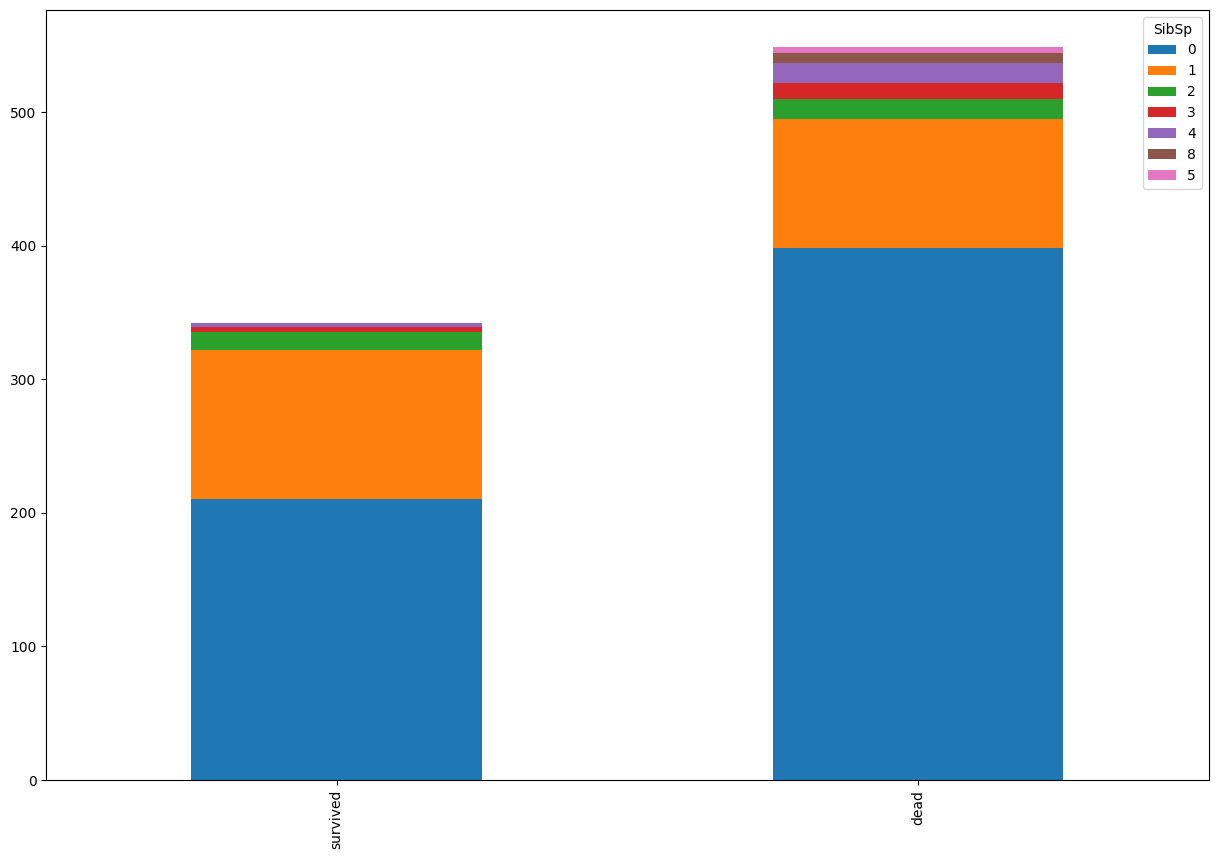

In [2927]:
bar_chart('SibSp')

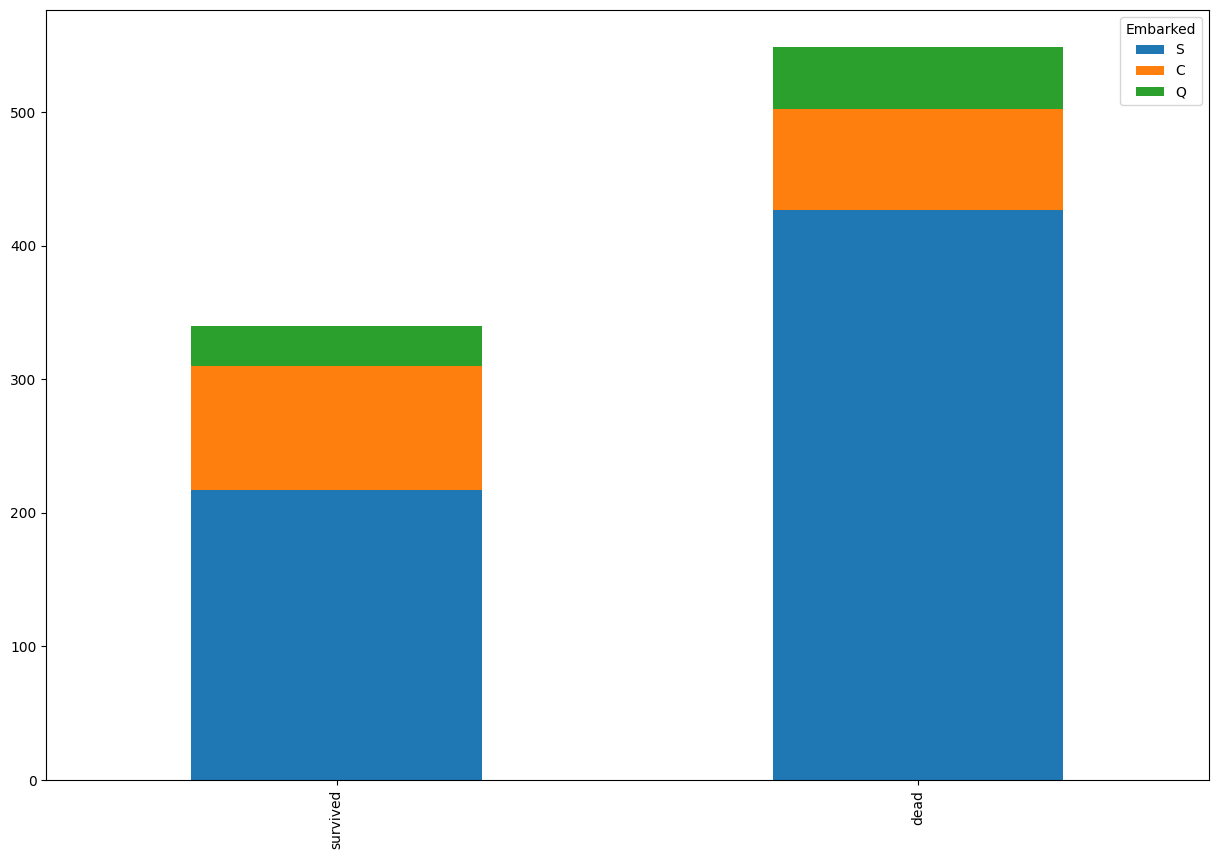

In [2928]:
bar_chart('Embarked')

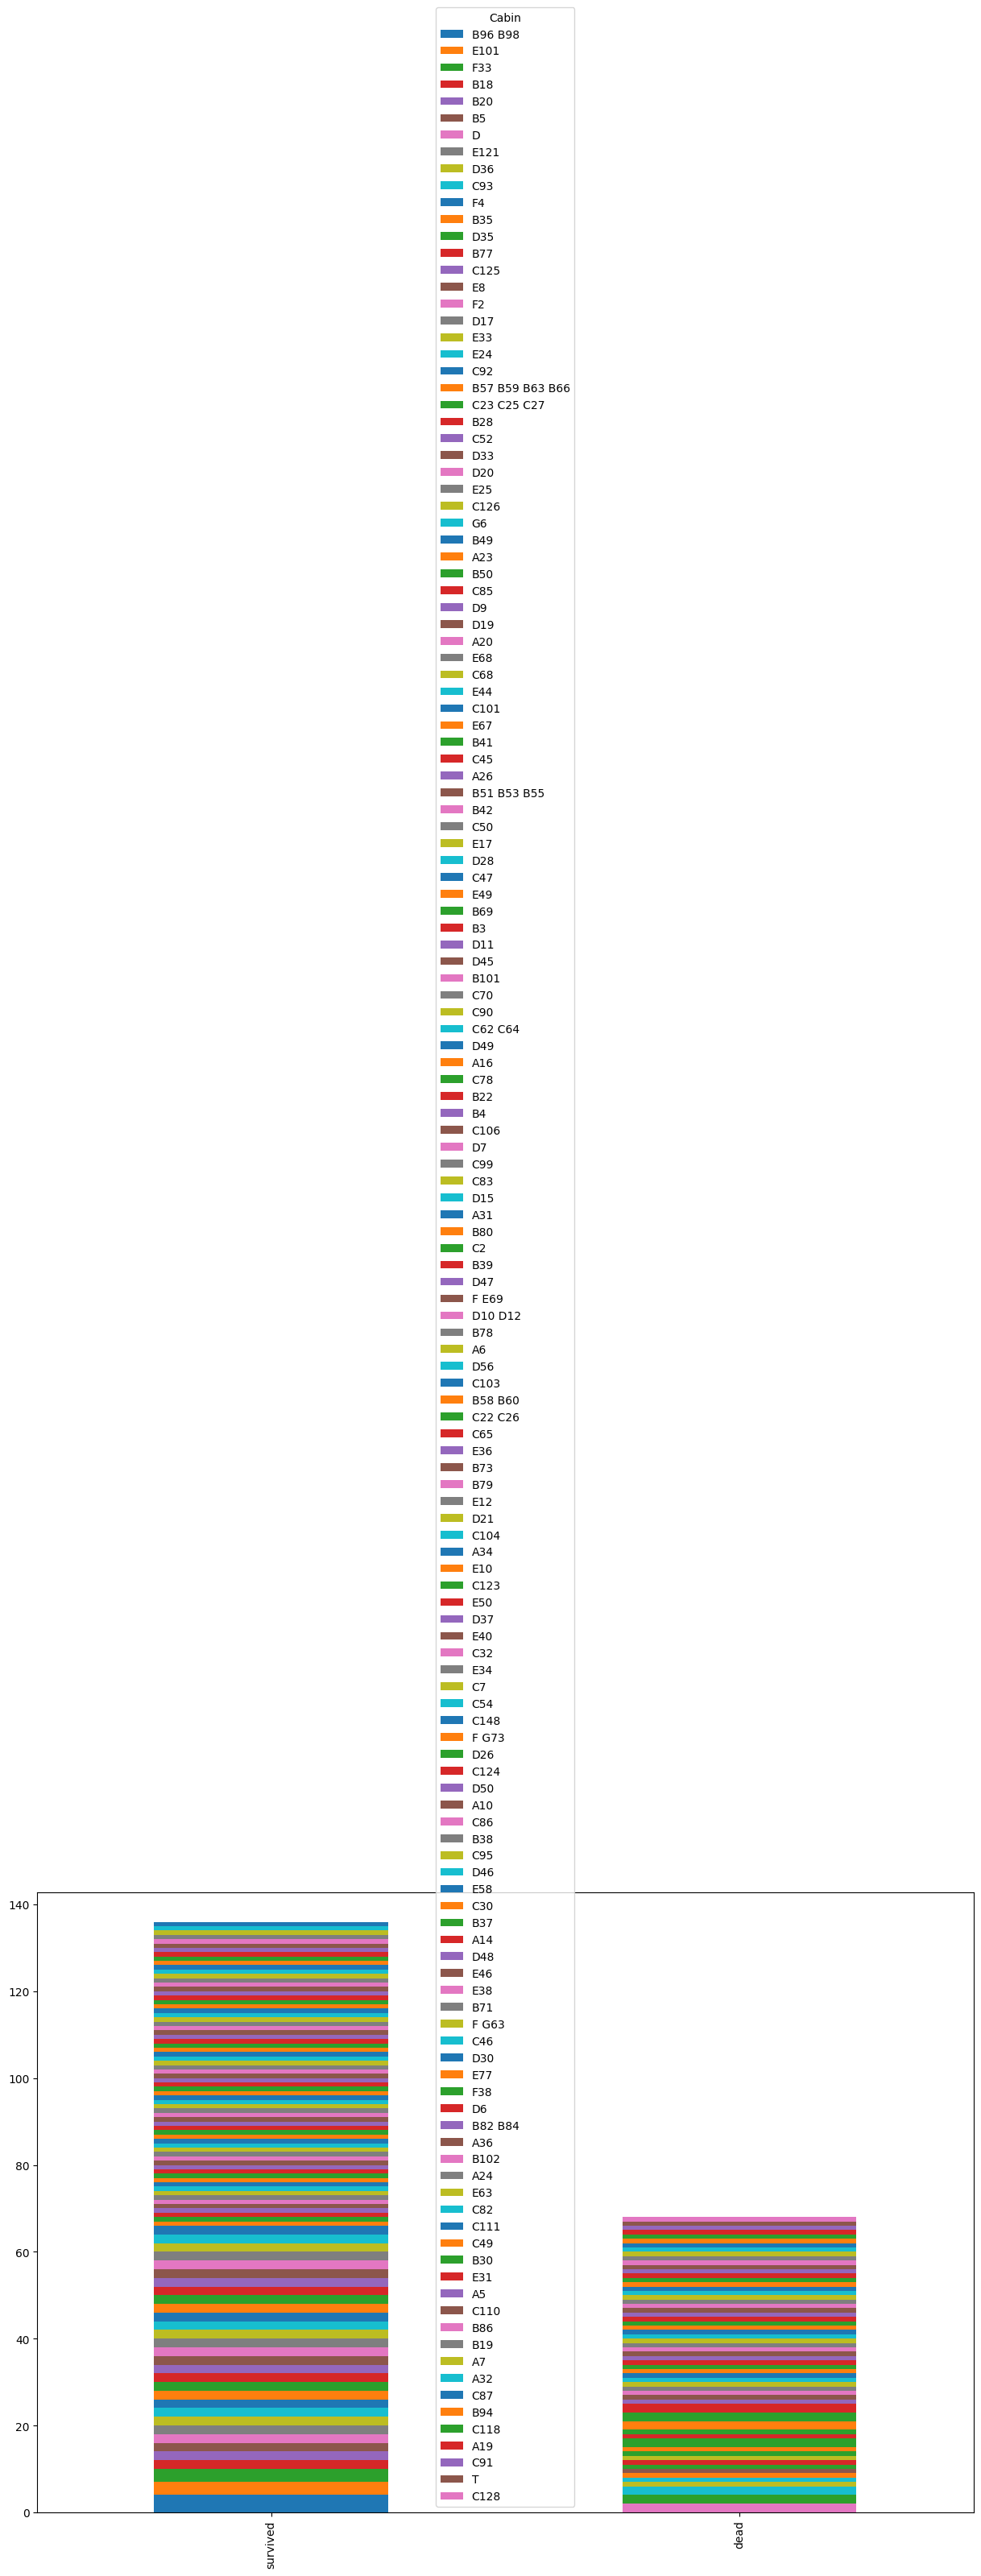

In [2929]:
bar_chart('Cabin')

In [2930]:
train['Cabin'][1][0]

'C'

---
#### 4. 데이터 정제, 전처리 : 특징 처리
---


In [2931]:
# 4.1 Titanic 침몰 상태?
Image(url='https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg', width=10000)

In [2932]:
# Name : 이름 Mr, Miss, Mrs 추출
# 데이터 전처리 주의 사항 : train data, test data 동시에 전처리 할 것
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['Title'] = train['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)
    
# train['Title'] = train['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)
# test['Title'] = test['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False)

In [2933]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [2934]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Miss
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mr


In [2935]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [2936]:
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
       'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'],
      dtype='object', name='Title')

In [2937]:
test['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr', 'Don', 'Mme'], dtype='object', name='Title')

In [2938]:
title_mapping = {
      'Mr' : 0
    , 'Miss' : 1
    , 'Mrs' : 2
    , 'Master' : 4
    , 'Dr' : 3
    , 'Rev' : 3
    , 'Mlle' : 3
    , 'Major' : 3
    , 'Col' : 3
    , 'Countess' : 3
    , 'Capt' : 3
    , 'Ms' : 3
    , 'Sir' : 3
    , 'Lady' : 3
    , 'Mme' : 3
    , 'Don' : 3
    , 'Jonkheer' : 3
}
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [2939]:
test['Title'].value_counts()

Title
Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: count, dtype: int64

In [2940]:
title_mapping = {
    'Mr' : 0 , 'Miss' : 1, 'Mrs' : 2, 'Master' : 4, 'Rev' : 3, 'Dr' : 3, 'Don' : 3, 'Mme' : 3
}
test['Title']= test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


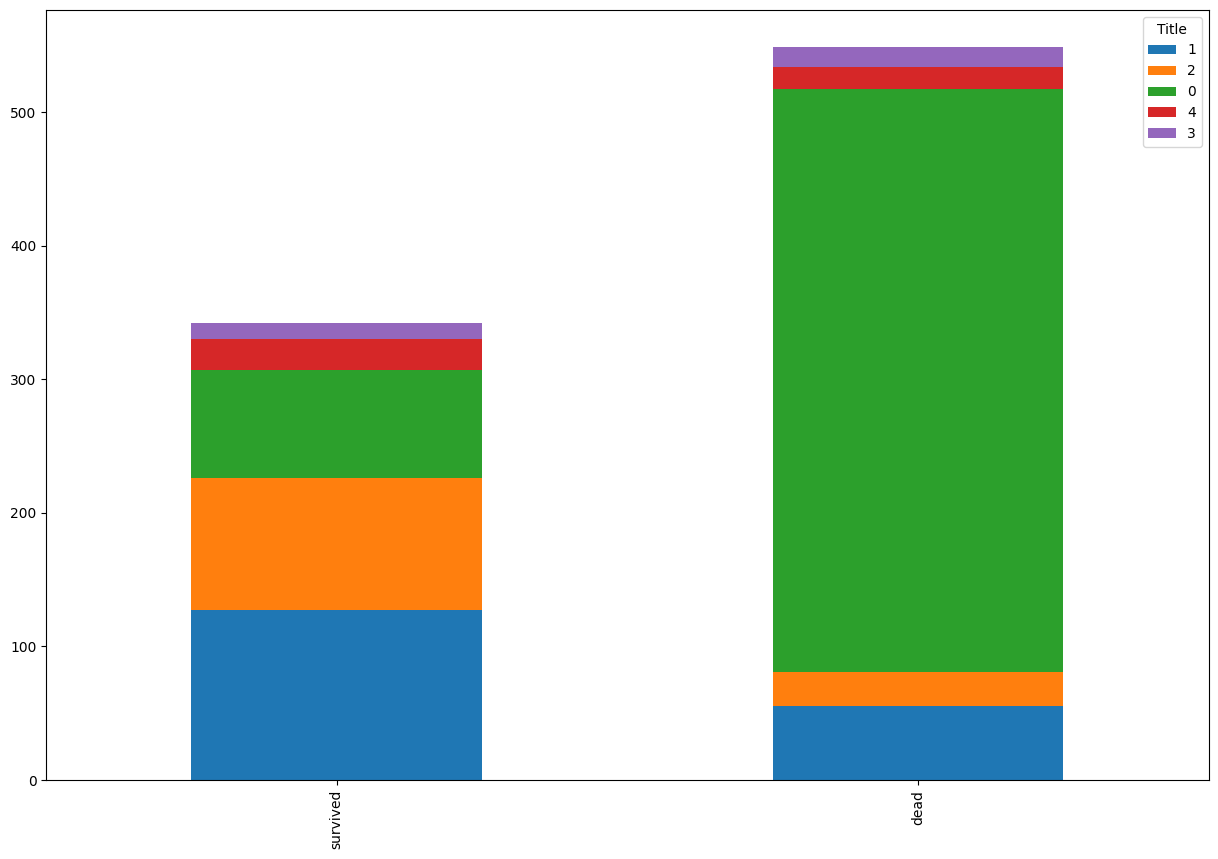

In [2941]:
bar_chart('Title')

In [2942]:
# Name => Title 추출, Name 컬럼 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)

In [2943]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


---
### 딥러닝은 데이터가 무조건 숫자로 바뀌어야 한다.
---

In [2944]:
# Sex => Feature
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [2945]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

---
#### 한쪽으로 쏠리는 데이터를 학습하면 그쪽은 잘 맞출수 있지만 반대편은 맞추기 어려워진다.

In [2946]:
# Sex => Feature
train['Sex'].value_counts()
# 남자는 0으로 바꾸고 여자는 1로 바군다.
sex_mapping ={
        'male' : 0
    ,   'female' : 1
}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [2947]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [2948]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,0


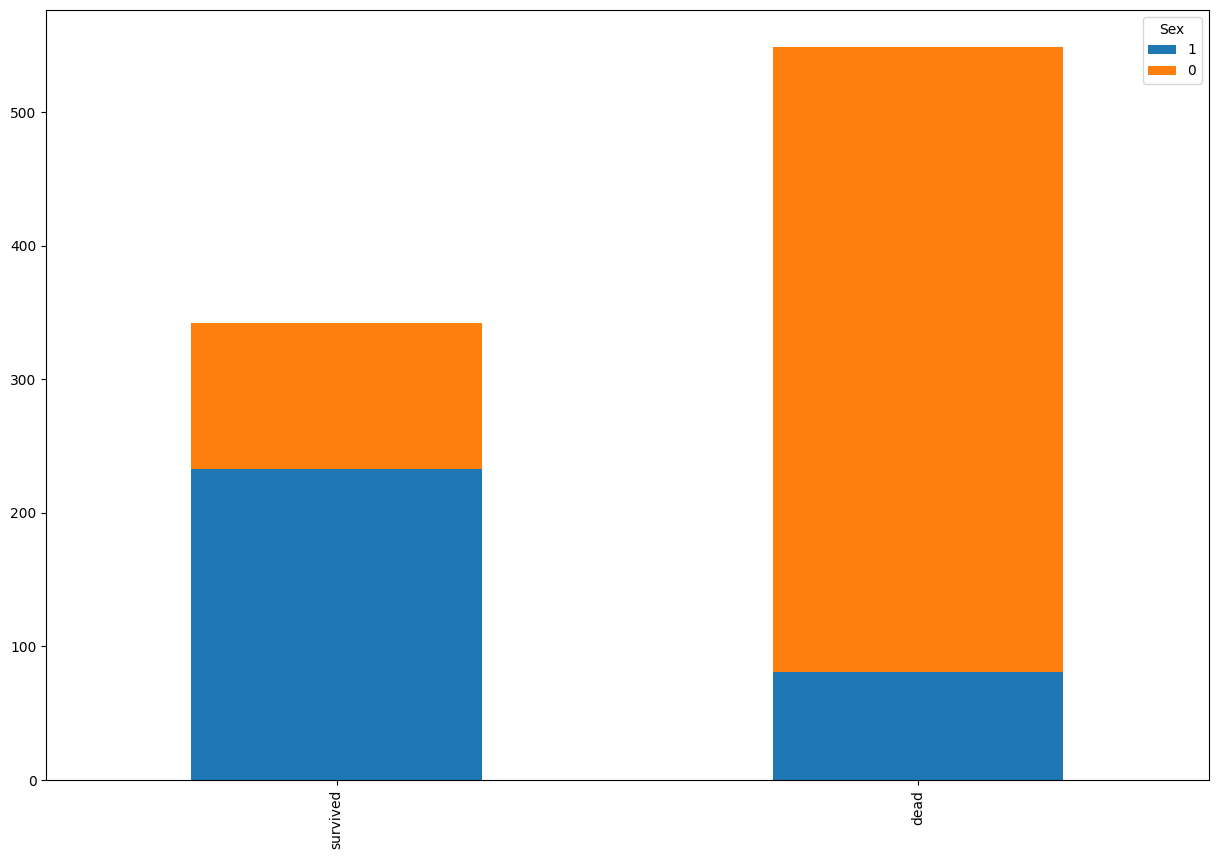

In [2949]:
bar_chart('Sex')

In [2950]:
# Age => Missing Value 결측치가 존재한다. => Title(0,1,2,3)들이 가지고 있는 median 중앙값으로 처리한다.
train['Age'].fillna(
    train.groupby('Title')['Age'].transform('median')
    , inplace=True
) # inplace=True => return None

In [2951]:
# 항구별 나이대별 요금의 평균을 구한다.

In [2952]:
for ticket in train['Ticket'].unique():
    train.loc[train['Ticket']==ticket,'group_size'] = len(train[train['Ticket']==ticket])

for ticket in test['Ticket'].unique():
    test.loc[test['Ticket']==ticket,'group_size'] = len(test[test['Ticket']==ticket])

In [2953]:
train['Fare'] = train['Fare'] / train['group_size']
test['Fare'] = test['Fare'] / test['group_size']

In [2954]:
train['group_size']

0      1.0
1      1.0
2      1.0
3      2.0
4      1.0
      ... 
886    1.0
887    1.0
888    2.0
889    1.0
890    1.0
Name: group_size, Length: 891, dtype: float64

In [2955]:
train.iloc[:10,:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,22.0,1,0,A/5 21171,7.25000,NaN,S,0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.28330,C85,C,2,1.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.92500,NaN,S,1,1.0
3,4,1,1,1,35.0,1,0,113803,26.55000,C123,S,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.05000,NaN,S,0,1.0
5,6,0,3,0,30.0,0,0,330877,8.45830,NaN,Q,0,1.0
6,7,0,1,0,54.0,0,0,17463,51.86250,E46,S,0,1.0
7,8,0,3,0,2.0,3,1,349909,5.26875,NaN,S,4,4.0
8,9,1,3,1,27.0,0,2,347742,3.71110,NaN,S,2,3.0
9,10,1,2,1,14.0,1,0,237736,15.03540,NaN,C,2,2.0


In [2956]:
test['Age'].fillna(
    test.groupby('Title')['Age'].transform('median')
    , inplace=True
)

In [2957]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0,1.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2,1.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,1,1.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,2,1.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,0,1.0


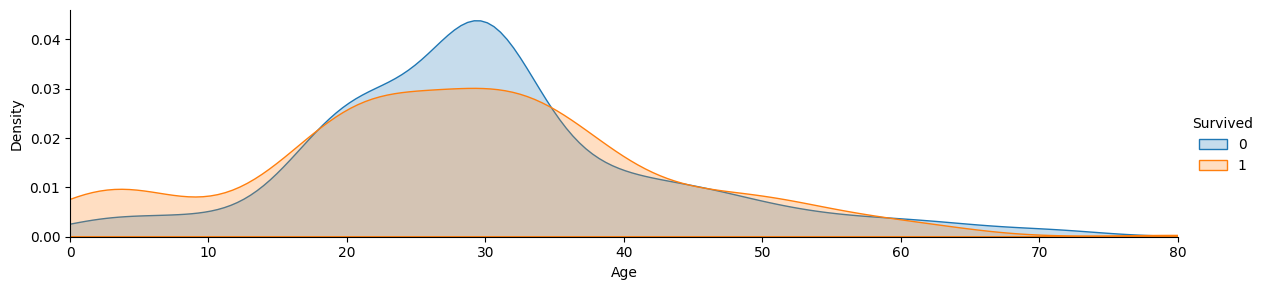

In [2958]:
# 나이에 대한 시각화
facet = sns.FacetGrid(train, hue='Survived', aspect=4) # object만 생성한다.
facet.map(sns.kdeplot, 'Age', fill=True) # 데이터의 차트 연동
facet.set(xlim=(0, train['Age'].max())) # x축 범위 지정
facet.add_legend() # 범례
plt.show()

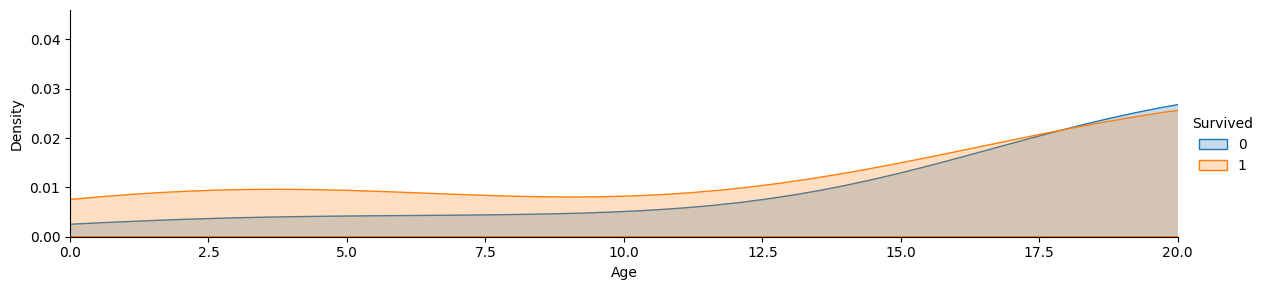

In [2959]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4) # object만 생성한다.
facet.map(sns.kdeplot, 'Age', fill=True) # 데이터의 차트 연동
facet.set(xlim=(0, train['Age'].max())) # x축 범위 지정
facet.add_legend() # 범례
plt.xlim(0,20)
plt.show()

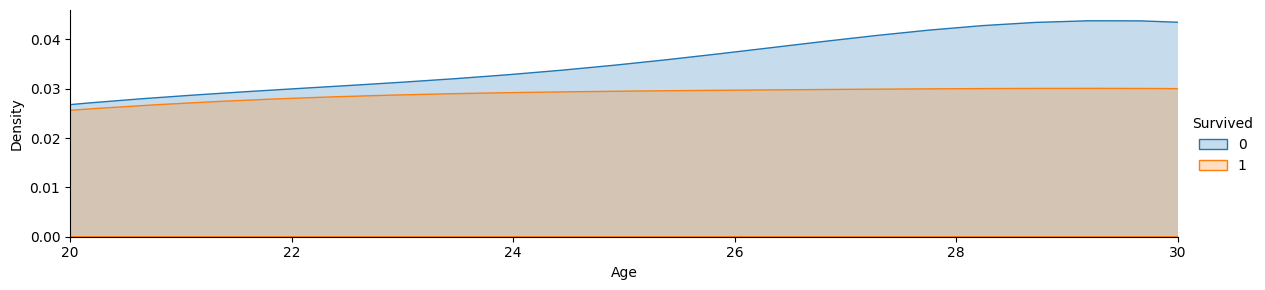

In [2960]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4) # object만 생성한다.
facet.map(sns.kdeplot, 'Age', fill=True) # 데이터의 차트 연동
facet.set(xlim=(0, train['Age'].max())) # x축 범위 지정
facet.add_legend() # 범례
plt.xlim(20,30)
plt.show()

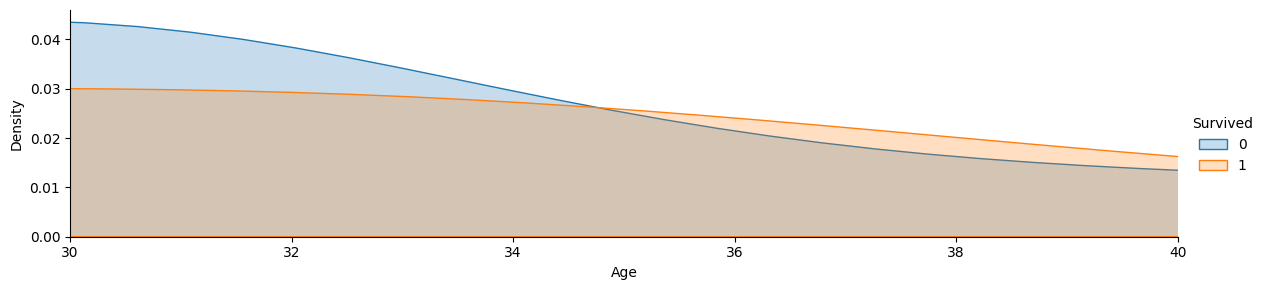

In [2961]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4) # object만 생성한다.
facet.map(sns.kdeplot, 'Age', fill=True) # 데이터의 차트 연동
facet.set(xlim=(0, train['Age'].max())) # x축 범위 지정
facet.add_legend() # 범례
plt.xlim(30,40)
plt.show()

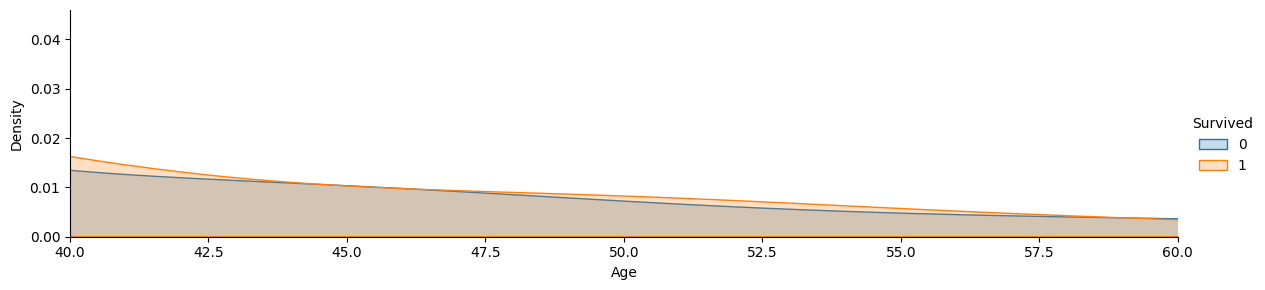

In [2962]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4) # object만 생성한다.
facet.map(sns.kdeplot, 'Age', fill=True) # 데이터의 차트 연동
facet.set(xlim=(0, train['Age'].max())) # x축 범위 지정
facet.add_legend() # 범례
plt.xlim(40,60)
plt.show()

In [2963]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
 12  group_size   891 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 90.6+ KB


In [2964]:
# 4.2 binning : Age => Categorical
# feature vector map
# child : 0, 0<child<=16
# young : 1, 16<young<=26
# adult : 2, 26<adult<=36
# mid-age : 3, 36<mid-age<=62
# senior : 4, 62<senior
# train_cp = train.copy()
train_test_data = [train,test]
for train_cp in train_test_data:
    train_cp.loc[train_cp['Age'] <= 16,'Age'] = 0
    train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26 ),'Age'] = 1
    train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36 ),'Age'] = 2
    train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62 ),'Age'] = 3
    train_cp.loc[train_cp['Age'] > 62,'Age'] = 4

train['Age'].value_counts(), test['Age'].value_counts()

(Age
 2.0    336
 1.0    255
 3.0    181
 0.0    104
 4.0     15
 Name: count, dtype: int64,
 Age
 2.0    166
 1.0    122
 3.0     89
 0.0     34
 4.0      7
 Name: count, dtype: int64)

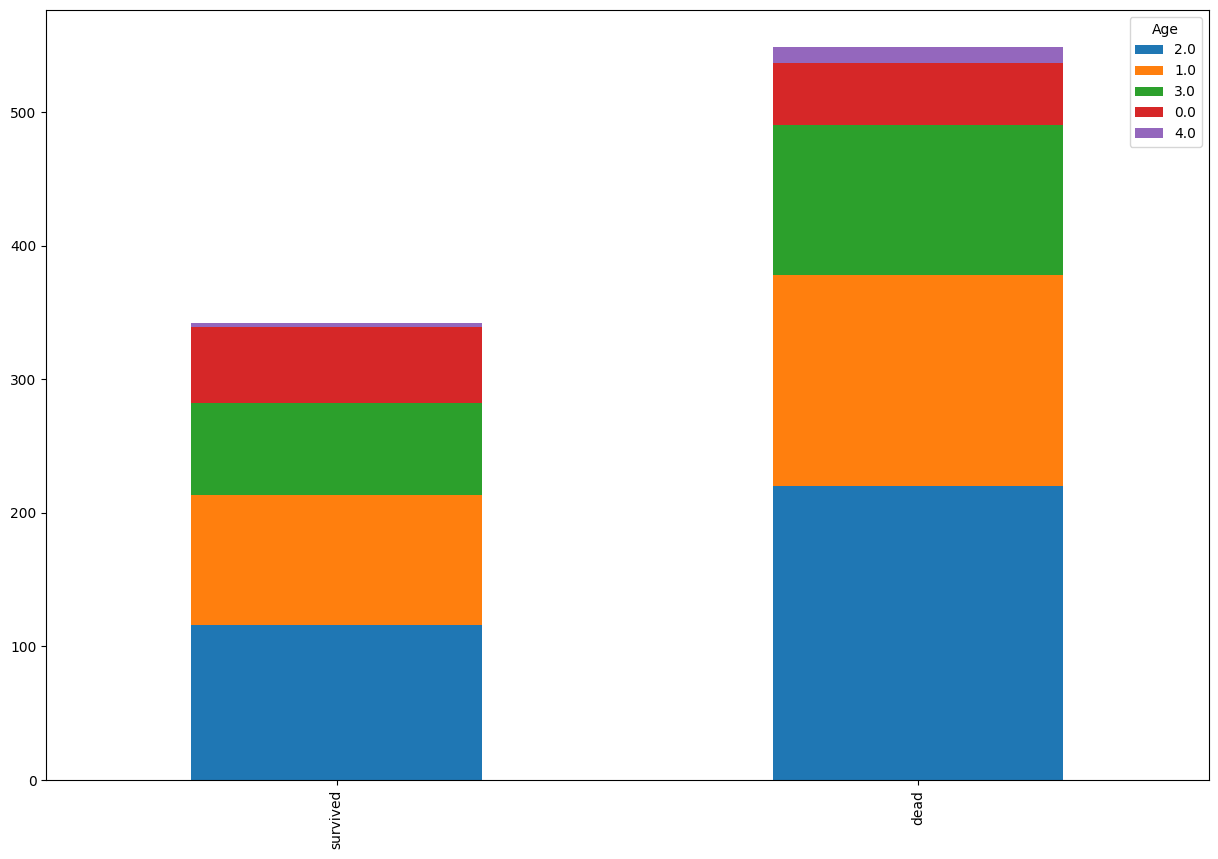

In [2965]:
bar_chart('Age')

In [2966]:
# Embarked
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
61,62,1,1,1,3.0,0,0,113572,40.0,B28,NaN,1,2.0
829,830,1,1,1,3.0,0,0,113572,40.0,B28,NaN,2,2.0


In [2967]:
#
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()

In [2968]:
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()

In [2969]:
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

<Axes: >

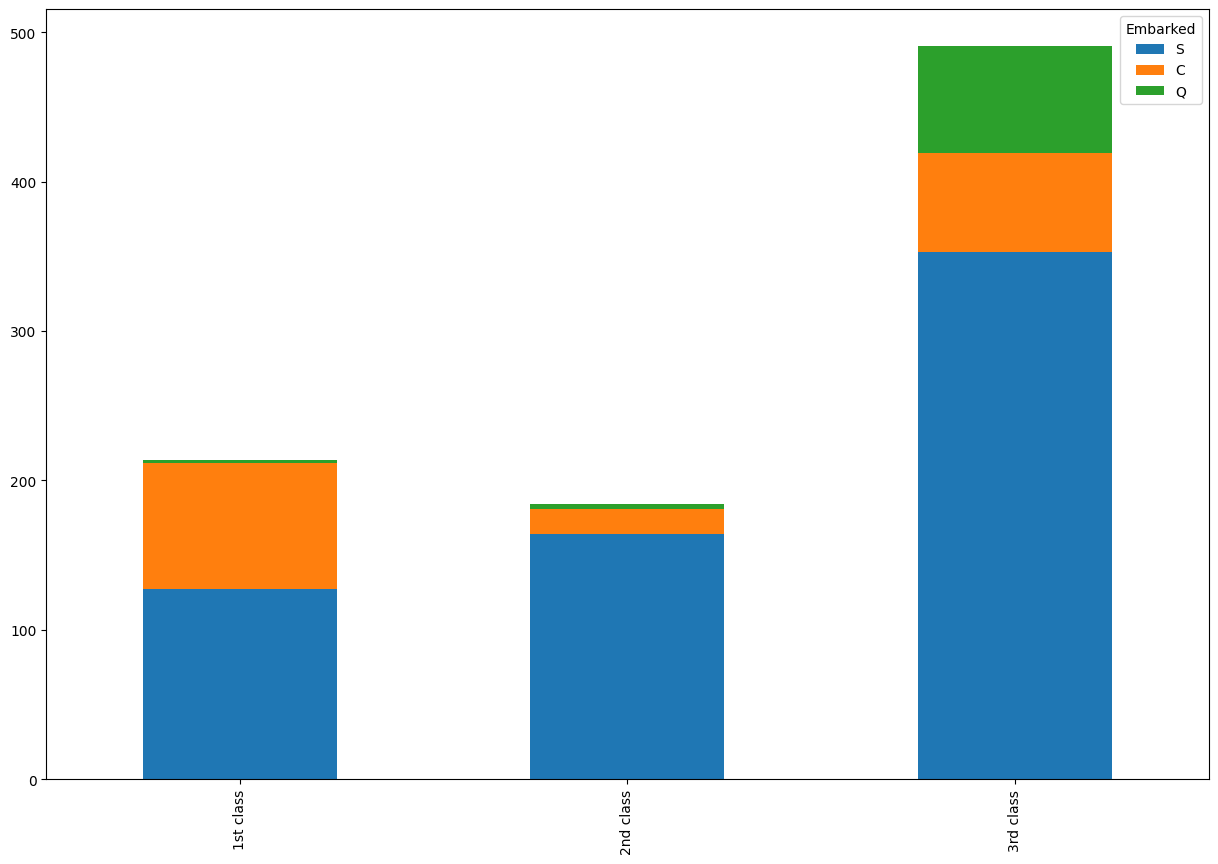

In [2970]:
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, figsize=(15,10))

In [2971]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [2972]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size


In [2973]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [2974]:
# Embarked value : string => number
Embarked_mapping ={
        'S' : 0
    ,   'C' : 1
    ,   'Q' : 2
}
train['Embarked'] = train['Embarked'].map(Embarked_mapping)
test['Embarked'] = test['Embarked'].map(Embarked_mapping)

In [2975]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2,1.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1.0
3,4,1,1,1,2.0,1,0,113803,26.5500,C123,0,2,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0,1.0


In [2976]:
train['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [2977]:
test['Embarked'].value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [2978]:
# 4.6 Fare : 가격
train['Fare'].isnull().sum()

0

In [2979]:
test['Fare'].isnull().sum()

1

In [2980]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
152,1044,3,0,3.0,0,0,3701,NaN,NaN,0,0,1.0


In [2981]:
test['Fare'].fillna(
        test.groupby('Pclass')['Fare'].transform('median')
    ,   inplace=True
)
test['Fare'].isnull().sum()

0

In [2982]:
test[test['PassengerId']==1044]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
152,1044,3,0,3.0,0,0,3701,7.8792,NaN,0,0,1.0


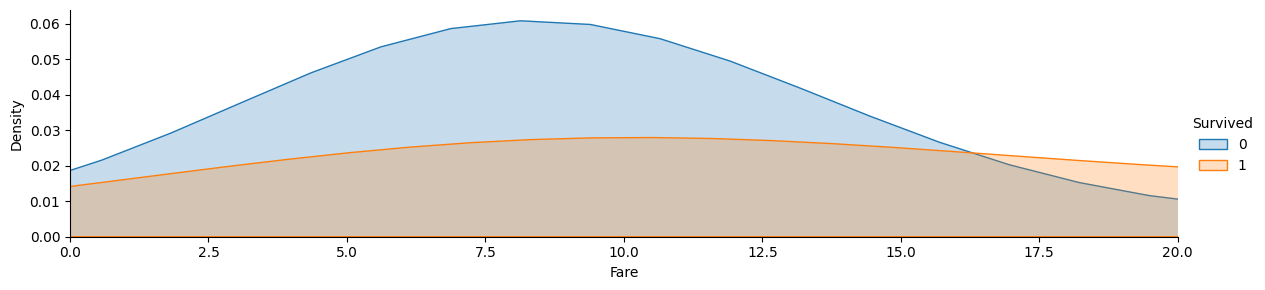

In [2983]:
# Fare Categorical
facet = sns.FacetGrid(
        train # DataFrame
    ,   hue='Survived' # 비교조건
    ,   aspect=4
)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()


In [2984]:
train.loc[train['Fare'] <=17 ,'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare']<= 30 ),'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare']<= 100 ),'Fare'] = 2
train.loc[train['Fare'] > 100 , 'Fare'] = 3

test.loc[test['Fare'] <=17 ,'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare']<= 30 ),'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare']<= 100 ),'Fare'] = 2
test.loc[test['Fare'] > 100 , 'Fare'] = 3

In [2985]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2,1.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,1.0
3,4,1,1,1,2.0,1,0,113803,1.0,C123,0,2,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0,1.0


In [2986]:
test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,NaN,0,0,1.0
414,1306,1,1,3.0,0,0,PC 17758,3.0,C105,1,0,1.0
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,2,1.0
416,1308,3,0,2.0,0,0,359309,0.0,NaN,0,2,1.0
417,1309,3,0,2.0,1,1,2668,1.0,NaN,1,1,1.0


## cabin 처리

In [2987]:
# train.Cabin.value_counts()
train['Cabin'].value_counts()
# train.Cabin.str[0]
# Cabin
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [2988]:
train.head(40)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2,1.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,1.0
3,4,1,1,1,2.0,1,0,113803,1.0,C,0,2,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0,1.0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0,1.0
6,7,0,1,0,3.0,0,0,17463,2.0,E,0,0,1.0
7,8,0,3,0,0.0,3,1,349909,0.0,NaN,0,4,4.0
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2,3.0
9,10,1,2,1,0.0,1,0,237736,0.0,NaN,1,2,2.0


In [2989]:
test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,NaN,0,0,1.0
414,1306,1,1,3.0,0,0,PC 17758,3.0,C,1,0,1.0
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,2,1.0
416,1308,3,0,2.0,0,0,359309,0.0,NaN,0,2,1.0
417,1309,3,0,2.0,1,1,2668,1.0,NaN,1,1,1.0


In [2990]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()

In [2991]:
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()

In [2992]:
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

<Axes: >

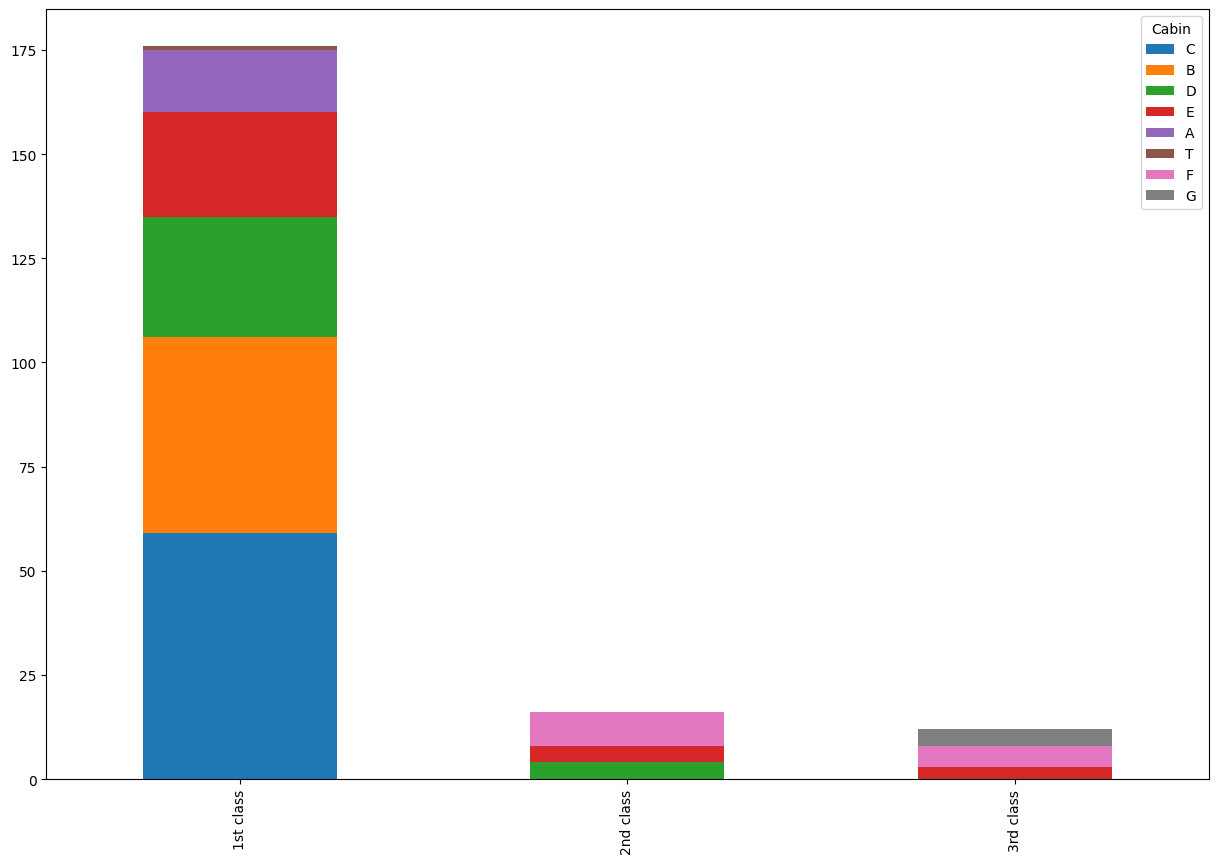

In [2993]:
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, figsize=(15,10)) 

In [2994]:
df

Cabin,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


In [2995]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Age,891.0,1.717172,0.971925,0.0,1.0,2.0,2.0,4.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,0.425365,0.756832,0.0,0.0,0.0,1.0,3.0
Embarked,891.0,0.361392,0.635673,0.0,0.0,0.0,1.0,2.0
Title,891.0,0.755331,1.089615,0.0,0.0,0.0,1.0,4.0


In [2996]:
cabin_mapping = {
      'A' : 0
    , 'B' : 0.4
    , 'C' : 0.8
    , 'D' : 1.2
    , 'E' : 1.6
    , 'F' : 2.0
    , 'G' : 2.4
    , 'T' : 2.8
}
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)



In [2997]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,1.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,1.0
3,4,1,1,1,2.0,1,0,113803,1.0,0.8,0,2,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0,1.0


In [2998]:
# fillna
train['Cabin'].fillna(
        train.groupby('Pclass')['Cabin'].transform('median')
    ,   inplace=True
)
test['Cabin'].fillna(
        test.groupby('Pclass')['Cabin'].transform('median')
    ,   inplace=True
)

In [2999]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,1.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1.0
3,4,1,1,1,2.0,1,0,113803,1.0,0.8,0,2,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1.0


In [3000]:
train['Cabin'].value_counts()

Cabin
2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: count, dtype: int64

In [3001]:
train['Fsize'] = train['SibSp'] + train['Parch'] + 1
test['Fsize'] = test['SibSp'] + test['Parch'] + 1

In [3002]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,Fsize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,1.0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1.0,1
3,4,1,1,1,2.0,1,0,113803,1.0,0.8,0,2,2.0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1.0,1


In [3003]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Age,891.0,1.717172,0.971925,0.0,1.0,2.0,2.0,4.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,0.425365,0.756832,0.0,0.0,0.0,1.0,3.0
Cabin,891.0,1.669585,0.540335,0.0,1.6,2.0,2.0,2.8
Embarked,891.0,0.361392,0.635673,0.0,0.0,0.0,1.0,2.0


In [3004]:
f_mapping = {
      1: 0
    , 2: 0.4
    , 3: 0.8
    , 4: 1.2
    , 5: 1.6
    , 6: 2.0
    , 7: 2.4
    , 8: 2.8
    , 9: 3.2
    , 10: 3.6
    , 11: 4.0
    }
train['Fsize'] = train['Fsize'].map(f_mapping)
test['Fsize'] = test['Fsize'].map(f_mapping)
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Age,891.0,1.717172,0.971925,0.0,1.0,2.0,2.0,4.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,0.425365,0.756832,0.0,0.0,0.0,1.0,3.0
Cabin,891.0,1.669585,0.540335,0.0,1.6,2.0,2.0,2.8
Embarked,891.0,0.361392,0.635673,0.0,0.0,0.0,1.0,2.0


In [3005]:
test['Fsize'].unique()

array([0. , 0.4, 0.8, 1.6, 1.2, 2. , 2.8, 2.4, 4. ])

In [3006]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'group_size', 'Fsize'],
      dtype='object')

In [3007]:
drop_feature = ['Ticket', 'SibSp', 'Parch','Cabin']
train = train.drop(drop_feature, axis=1)
test = test.drop(drop_feature, axis=1)

In [3008]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,group_size,Fsize
0,892,3,0,2.0,0.0,2,0,1.0,0.0
1,893,3,1,3.0,0.0,0,2,1.0,0.4
2,894,2,0,3.0,0.0,2,1,1.0,0.0
3,895,3,0,2.0,0.0,0,2,1.0,0.0
4,896,3,1,1.0,0.0,0,0,1.0,0.8


In [3009]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

---
### Modeling
---

In [3010]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb 
from xgboost import XGBClassifier
import numpy as np

In [3011]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=13) # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.5375156054931336


In [3012]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = DecisionTreeClassifier() # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.7451685393258427


In [3013]:
# k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
# clf = RandomForestClassifier(n_estimators=100, max_depth=3) # Knn Model object
# scoring = 'accuracy' #평가지표 : 정확도
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# print(score.mean())

---
### Testing
---

In [3014]:
# clf = RandomForestClassifier(n_estimators=100, max_depth=7)
# clf.fit(train_data, target) # 학습

# prediction = clf.predict(test) # 테스트 데이터로 예측값 추출

In [3015]:
# prediction

In [3016]:
xgboost  = XGBClassifier()
xgboost.fit(train_data, target)
scoring = 'accuracy'
score = cross_val_score(xgboost, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
prediction = xgboost.predict(test)
print(score.mean())


0.7922846441947565


In [3017]:
# submission = pd.DataFrame(
#     {
#         "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
#         "Survived":prediction
#     }
# )
# submission.to_csv('titanic.csv', index=False)

In [3018]:
submission1 = pd.read_csv('../답/submission (1).csv')
del submission1['PassengerId']
submission1 = pd.read_csv('../답/submission (1).csv')
del submission1['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction, submission1)
accuracy

0.7129186602870813